# F-test

## Import packages

In [1]:
'''
Credit to GitHub user Jaimin09
Link: https://github.com/Jaimin09/Coding-Lane-Assets/tree/main/Logistic%20Regression%20in%20Python%20from%20Scratch
Last accessed: 28/10/2021
'''
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy
import v1_model as v1
import v2_model as v2
from scipy import stats
from scipy.stats import norm
from matplotlib.font_manager import FontProperties



In [2]:
# List containing medals earned for each athlete  
Y_list = ['MedalEarned']

# ! Get dataset
filepath = 'Datasets/expert_data.csv' # Data for Specialized athletes i.e. competing in one sport
df = pd.read_csv(filepath)
df = df.reset_index() # Resets index for dataset 

# Import data and set seed 

## Weights, data  and probability predictions for v1

In [3]:
# List of variables we are interested in 
X_list_v1 = ['Height',
             'Weight',
             'Age']

# Import model weights after v1_model has been run 
W_array = np.genfromtxt('Parameters/W.csv', delimiter=',')# Len of array is equal to iterations
B_array = np.genfromtxt('Parameters/B.csv', delimiter=',')

In [4]:
# Produce weight for model
def ProduceWeights(df, W, B, X_list):
    # Get data for model
    X_model_df = df[X_list] # Dataframe contains X_list columns 
    Y_model_df = df[Y_list]
    
    X_array, Y_array = v1.Reshape(X_model_df, Y_model_df) # Drops ID and transforms each column to a numpy array
    
    # Get model guesses 
    # Use dot product on weights and the variable values for each athlete i.e. Ath1 = w1*var1 + w2*var2(..) + B
    lin_func = np.dot(W.T, X_array) + B
    
    # Use linear expression in sigmoid function to get model guess for each athlete 
    sf = 1/(1 + np.exp(-lin_func))
    
    return sf

### F test loop v1

In [5]:
# Generate model predictions in two cases. 
# 0. Model weights remain unchanged 
# 1. ith weight is set to 0
# Append model guesses to lists dependent on  the number of variables i.e. 4 variables creates a list of 4 arrays. 

def f_test_loop_v1(df, W, B, X_list):
    
    # Store model guesses with weights unchanged, and create empty list to store model prediction with weights changed
    pred_prob_result_list = []
    pred_prob = ProduceWeights(df, W, B, X_list)
    
    for index, element in enumerate(X_list):
        
        # Print output for each iteration
        print(f'The current index is {index}')
        print(f'The current element is {element}')
        
        # Change weights back to values found in W
        W_test = copy.deepcopy(W)
        W_test[index] = 0 # index weight set to 0
        
        # Get a list of model guesses where weights are changed
        pred_prob_result = ProduceWeights(df, W_test, B, X_list)
        
        # Append array of model guesses to list 
        pred_prob_result_list.append(pred_prob_result)
    
    return pred_prob, pred_prob_result_list

In [6]:
# Get first weight in CSV file of weights 
W_par = np.array([W_array[0][0], W_array[1][0], W_array[2][0]], ndmin= 0)
B_par = B_array[0]

# Create list of arrays of model guesses 
pred_prob_v1, pred_prob_result_list_v1 = f_test_loop_v1(df, W_par, B_par, X_list_v1) 

The current index is 0
The current element is Height
The current index is 1
The current element is Weight
The current index is 2
The current element is Age


## Weights, data  and probability predictions for v2

In [7]:
X_list_v2 = ['Height_Dev_Event', 'Weight_Dev_Event', 'Age_Dev_Event']
X_list_dist = ['PreviousMedals', 'NOC_advantage', 
            'Height_Dev', 'Weight_Dev', 'Age_Dev',
            'Height_Dev_Event', 'Weight_Dev_Event', 'Age_Dev_Event']

Accuracy of the model is : 79.47 %


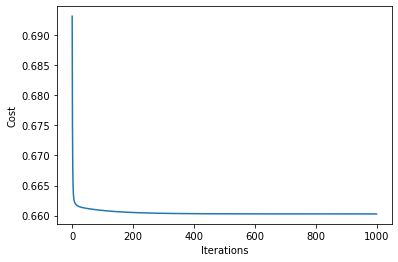

In [8]:
# Run v2_model
cop = 0.6
W, B, val_acc, val_occ_dic, X_val, Y_val = v2.RunModel(df, X_list_v2, Y_list, cop, iterations=1000, learning_rate= 0.02)
sf = v2.PredProb(X_val, W, B)

### F test loop v2

In [9]:
# Generate model predictions in two cases. 
# 0. Model weights remain unchanged 
# 1. ith weight is set to 0
# Append model guesses to lists dependent on  the number of variables i.e. 4 variables creates a list of 4 arrays. 

def f_test_loop_v2(sf, W, B, X_val, X_list):
    
    # Store model guesses with weights unchanged, and create empty list to store model prediction with weights changed
    pred_prob_result_list = []
    
    for index, element in enumerate(X_list):
        
        # Print output for each iteration
        print(f'The current index is {index}')
        print(f'The current element is {element}')
        
        # Change weights back to values found in W
        W_test = copy.deepcopy(W)
        
        W_test[index] = 0 # index weight set to 0
        
        # Get a list of model guesses where weights are changed
        pred_prob_result = v2.PredProb(X_val, W_test, B)
        #print(pred_prob_result)
        
        # Append array of model guesses to list 
        pred_prob_result_list.append(pred_prob_result)
    
    return pred_prob_result_list

In [10]:
pred_prob_result_list_v2 = f_test_loop_v2(sf, W, B, X_val, X_list_v2)

The current index is 0
The current element is Height_Dev_Event
The current index is 1
The current element is Weight_Dev_Event
The current index is 2
The current element is Age_Dev_Event


# Normality 

In [11]:
def Distribution(df, X_list):
    df_vars = df[X_list]
    
    for i in df_vars.columns:
        sns.distplot(df_vars[i], fit=norm) # Define distributions
        
        # Plot distributions
        plt.ylabel('Frequency')
        plt.title(f'{i} Distribution')
        
        # QQ-plot
        plt.figure()
        stats.probplot(df_vars[i], plot= plt)
        plt.title(f'{i} QQ-plot')
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


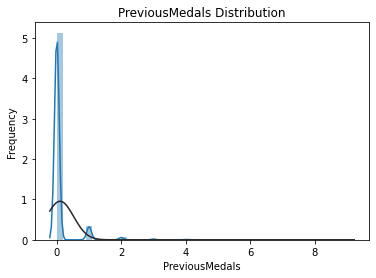

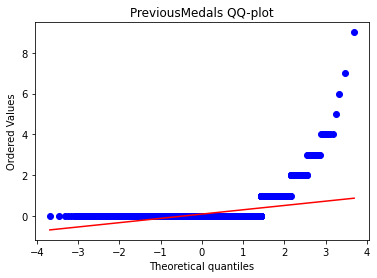

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


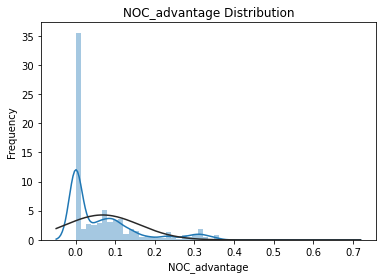

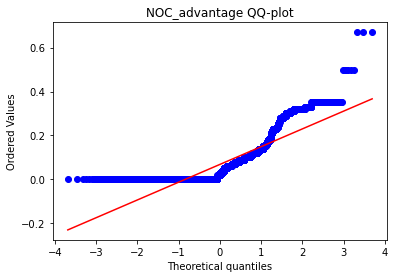

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


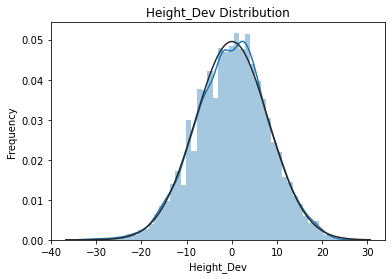

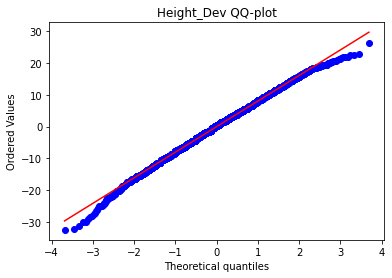

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


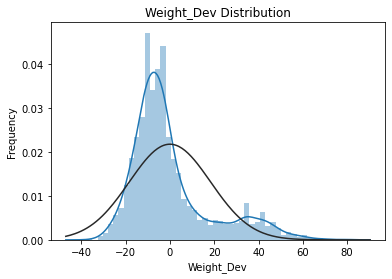

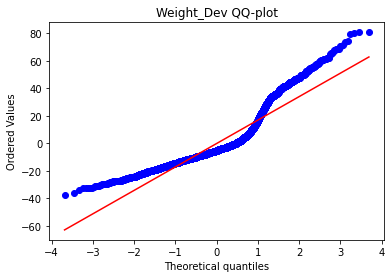

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


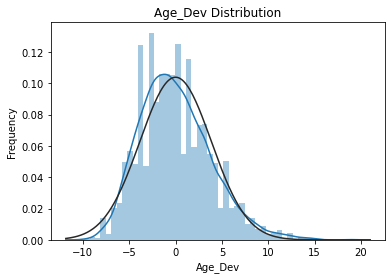

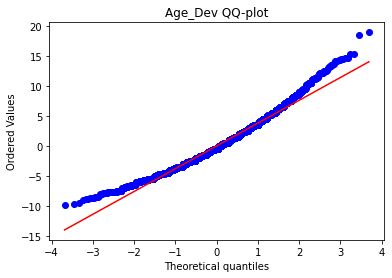

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


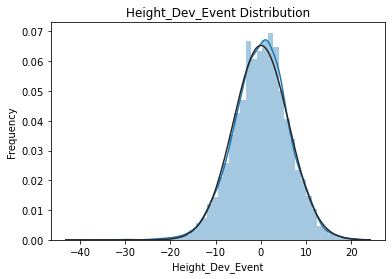

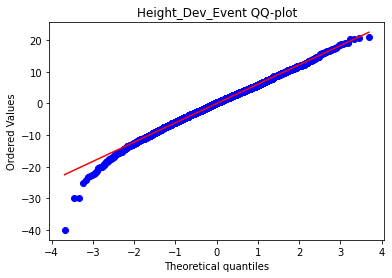

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


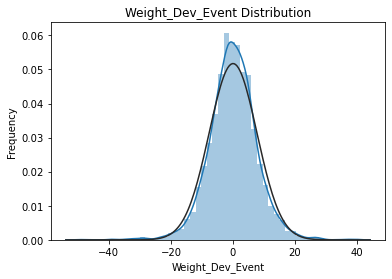

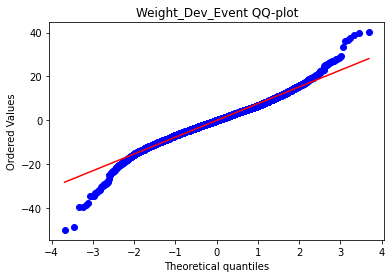

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


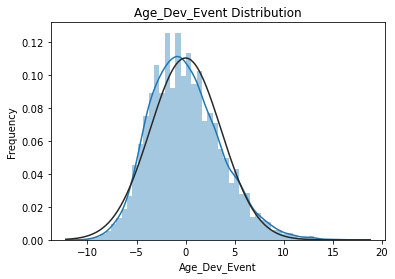

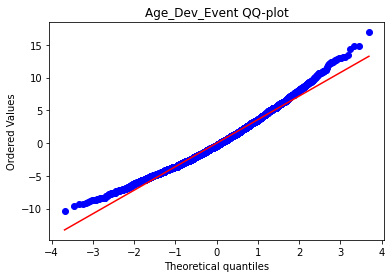

In [12]:
Distribution(df, X_list_dist)

# F-test

In [13]:
# F-test: https://link.springer.com/book/10.1007%2F978-3-319-46162-5 
# Code adapted from: https://www.statology.org/f-test-python/

# F test arrays of model guesses 
# 0. Model weights remain unchanged 
# 1. ith weight is set to 0

def f_test(sig_0_probabilities,sig_1_probabilities, X_list, name_list):
    f_test_list = []
    
    for i in range(len(sig_1_probabilities)):
        f = np.var(sig_0_probabilities, ddof=1)/np.var(sig_1_probabilities[i], ddof=1) #calculate F test statistic 
        dfn = sig_0_probabilities.size-1 #define degrees of freedom numerator 
        dfd = sig_1_probabilities[i].size-1 #define degrees of freedom denominator 
        p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
        f_test_list.append(round(p, 8))
        
        # Print current variable and p value 
        print(f'The current variable is: {X_list[i]}\nThe current p-value is: {p}')
        
        # Define alpha and print conclusion of hypothesis test 
        if p <= 0.05:
            print(f"null hypothesis is rejected: p-value = {p}.\nThe probablity of the two distributions' variance being equal is low.\nThe variable is likely to impact model output.\n")
        else:
            print(f"null hypothesis cannot be rejected: p-value = {p}.\nThe probablity of the two distributions' variance being equal is high.\nThe variable is unlikely to impact model output.\n") 
    
    report = pd.DataFrame({
                        f'{name_list[0]}': f_test_list[0],
                        f'{name_list[1]}': f_test_list[1],
                        f'{name_list[2]}': f_test_list[2],
                        },
                        index= ['P-value'])
    
    print(report)
    
    # Plot dataframe as table
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    t= ax.table(cellText=report[[f'{name_list[0]}', f'{name_list[1]}', f'{name_list[2]}']].head( n=3).values, # Set header names
                colWidths = [0.2]*len(report.columns), colColours = ['royalblue']*3, # Set header cell size and colour
                rowLabels=report.index ,colLabels=report.columns,  loc='center') # Fill tabel
    
    # Set layout features
    t.auto_set_font_size(False) 
    t.set_fontsize(8)
    fig.tight_layout()
    
    # Colour content cells white
    for i in range(3):
        cell = t[0,i]
        cell.get_text().set_color('white')
    
    # Set header cells font to bold
    for (row, col), cell in t.get_celld().items():
        if (row == 0) or (col == 3):
            cell.set_text_props(fontproperties=FontProperties(weight = 'bold'))
    
    plt.show()
    
    return f_test_list

The current variable is: Height
The current p-value is: 2.3333889598298185e-08
null hypothesis is rejected: p-value = 2.3333889598298185e-08.
The probablity of the two distributions' variance being equal is low.
The variable is likely to impact model output.

The current variable is: Weight
The current p-value is: 1.1102230246251565e-16
null hypothesis is rejected: p-value = 1.1102230246251565e-16.
The probablity of the two distributions' variance being equal is low.
The variable is likely to impact model output.

The current variable is: Age
The current p-value is: 1.9696747788344737e-08
null hypothesis is rejected: p-value = 1.9696747788344737e-08.
The probablity of the two distributions' variance being equal is low.
The variable is likely to impact model output.

               Height  Weight           Age
P-value  2.000000e-08     0.0  2.000000e-08


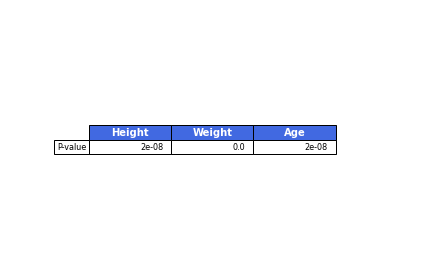

In [14]:
name_list_v1 = ['Height', 'Weight', 'Age']
f_test_list_v1 = f_test(pred_prob_v1, pred_prob_result_list_v1, X_list_v1, name_list_v1)

The current variable is: Height_Dev_Event
The current p-value is: 1.1102230246251565e-16
null hypothesis is rejected: p-value = 1.1102230246251565e-16.
The probablity of the two distributions' variance being equal is low.
The variable is likely to impact model output.

The current variable is: Weight_Dev_Event
The current p-value is: 1.1102230246251565e-16
null hypothesis is rejected: p-value = 1.1102230246251565e-16.
The probablity of the two distributions' variance being equal is low.
The variable is likely to impact model output.

The current variable is: Age_Dev_Event
The current p-value is: 0.31405096278523215
null hypothesis cannot be rejected: p-value = 0.31405096278523215.
The probablity of the two distributions' variance being equal is high.
The variable is unlikely to impact model output.

         Height dev.  Weight dev.  Age dev.
P-value          0.0          0.0  0.314051


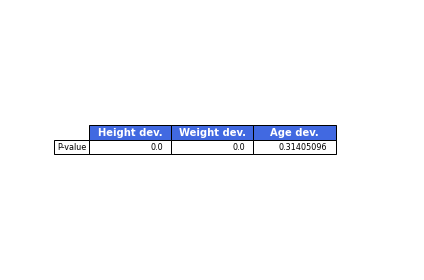

In [15]:
name_list_v2 = ['Height dev.', 'Weight dev.', 'Age dev.']
f_test_list_v2 = f_test(sf, pred_prob_result_list_v2, X_list_v2, name_list_v2)